# Imports first, then the Assignment (6 Tasks)


In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4634, done.
remote: Total 4634 (delta 0), reused 0 (delta 0), pack-reused 4634
Receiving objects: 100% (4634/4634), 7.38 MiB | 18.42 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_e

# Task 1: Design an NFA for $\{0,1\}^* 1 0$ ("Ends 10")

## It will be a 3-state NFA.

## Name the states I, S0, and F.

### Document each line of your Jove code with a short comment.


In [2]:
# SOLUTION

nfaEnds10 = md2mc('''

NFA

  I : 0 | 1 -> I  !! I loops back to itself for any valid character in the alphabet.
  I : 1 -> S0     !! I can go to S0 if given a 1.
  S0 : 0 -> F     !! S0 goes to F if given a 0. Will drop off if given a 1.
  !! F drops off if given any char.
 
''')

Generating LALR tables


# Task 2: Determine States in Animation

Put the above NFA in animation, and note down the set of states attained
after the DFA has seen every character in 10010. More detailed instructions follow.

## Execute the cell below and follow the bulleted instructions:

* When the animation pane comes up, type in 10010 and click Animate

* Then click the ">|" button, which is for single-stepping

* Note down the results as you single-step, and fill answers in 1b(ii) below


In [3]:
AnimateNFA(nfaEnds10, FuseEdges=False)
display(HTML('<link rel=\"stylesheet\" href=\"//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css\"/>'))

## Provide these answers based on single-stepping the animation (please type in a SET OF STATES - else no credit). 

## Also say whether a token dropped out of the diagram (with the move on a symbol being undefined) and whether the state reached is final. 

### SET of states before consuming any of 10010 = { I }
#### NONE OF THESE

### SET of states AFTER consuming "1" and before consuming "0010"  = { I, S0 }
#### NONE OF THESE

### SET of states AFTER consuming "10" and before consuming "010"  = { I, F }
#### The SET of states reached is FINAL

### SET of states AFTER consuming "100" and before consuming "10"  = { I }
#### A Token Dropped Out

### SET of states AFTER consuming "1001" and before consuming "0"  = { I, S0 }
#### NONE OF THESE

### SET of states AFTER consuming "10010" entirely  = { I, F }
#### The SET of states reached is FINAL

# Task 3: Convert the NFA to a DFA and answer questions

Convert the NFA to a DFA by the command below, and answer the questions below.

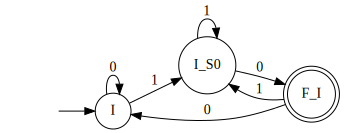

In [4]:
dotObj_dfa(nfa2dfa(nfaEnds10, STATENAME_MAXSIZE=50), STATENAME_MAXSIZE=50)

#### State DFA is in after 10010 = F_I

The DFA ends in the F_I state.

#### Set of states NFA is in after 10010 (last ans of 1b(ii) ) = { I, F }

The NFA ends in either the I state, or the F state.

#### Do the above match? Recall that for an NFA set of states (A,B), a DFA state may be named A_B or B_A. We use "match" in this sense.

Yes, the above DFA state and NFA set of states match.

#### Reason that the above should match? Please provide a sentence stating when a DFA accepts and when an NFA accepts in terms of its tokens being in many states that includes a final state.

The DFA accepts when it is in a single final state and the NFA accepts when there exists at least one final state in its set of current states. So, the above must match because they are both final states (or final sets of states), and they are the only final instances for the DFA and NFA.

# Task 4: Design an NFA for $\{\varepsilon, 0\}$ 
### It will be a 2-state NFA with an IF state and a final state (call that final state "F2" )

In [5]:
nfaEps0 = md2mc('''
NFA
  IF : 0 -> F2
''')

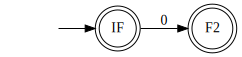

In [6]:
dotObj_nfa(nfaEps0)

# A tutorial on Concatenating NFA

Watch this video, then do Task 5.

To watch the video separately in Youtube in large size, 
visit https://youtu.be/VWyOT1uYfIc

Otherwise just run the command below!

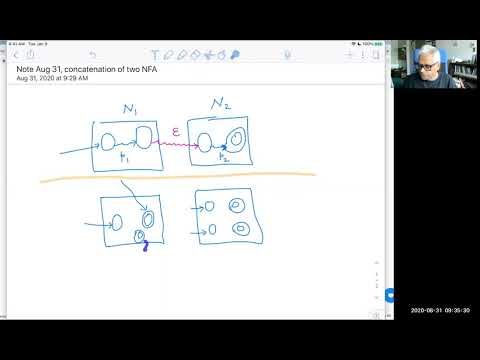

In [7]:
# NFA Concatenation
from IPython.display import YouTubeVideo
YouTubeVideo('VWyOT1uYfIc')

# Task 5: Develop a Concatenation NFA

## Concatenate nfaEnds10 and nfaEps0 to obtain NFAEnds10Eps0.

### Follow the steps in the above video.

### Describe the steps in a few bullets below, then finish the notebook code cell that defines NFAEnds10Eps0 below where space is provided for your work.


### Steps:

 * Change final states in the starting NFA to normal states.
 * Change initial states in the second NFA to normal states (or final states if they were originally IF states).
 * Connect each previously final state in the starting NFA to each previously initial state in the second NFA with empty string connections.

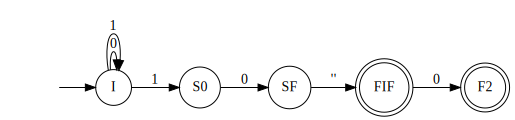

In [36]:
NFAEnds10Eps0 = md2mc('''
NFA
  I : 0 | 1 -> I  !! I loops back to itself for any valid character in the alphabet.
  I : 1 -> S0     !! I can go to S0 if given a 1.
  S0 : 0 -> SF     !! S0 goes to F if given a 0. Will drop off if given a 1.
  SF : "" -> FIF
  FIF : 0 -> F2
''')

dotObj_nfa(NFAEnds10Eps0)

# Show the full Concatenation NFA below


In [37]:
# Here is the resulting NFA

NFAEnds10Eps0 = md2mc('''
NFA 

!!---- Put NFA 1's transitions below, 
!!----  after suitably renaming states to make final states non-final etc.
   I : 0 | 1 -> I  !! I loops back to itself for any valid character in the alphabet.
   I : 1 -> S0     !! I can go to S0 if given a 1.
   S0 : 0 -> SF     !! S0 goes to F if given a 0. Will drop off if given a 1.


!!--- put the "bridge" transition below
   SF : "" -> FIF
 

!!--- put NFA 2's transitions below, again after suitable state renamings as above
   FIF : 0 -> F2
 

''')

## Draw the concat NFA and convert to a DFA

... Run the THREE commands below, and then move on to do Task 6 
... based on the results you observe from these commands.


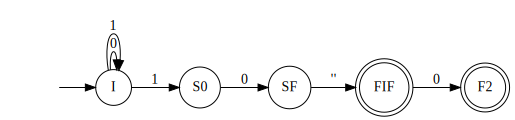

In [38]:
# command-1
dotObj_nfa(NFAEnds10Eps0)

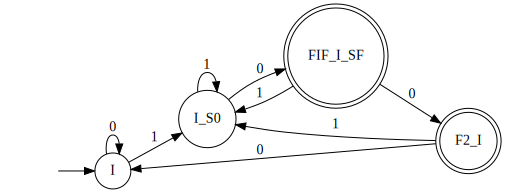

In [39]:
# command-2

dotObj_dfa(nfa2dfa(NFAEnds10Eps0, STATENAME_MAXSIZE=50), STATENAME_MAXSIZE=50)

In [40]:
# Let us see its internal representation -- this may give you hints for doing Task 6.

# command-3

NFAEnds10Eps0

{'Delta': {('FIF', '0'): {'F2'},
  ('I', '0'): {'I'},
  ('I', '1'): {'I', 'S0'},
  ('S0', '0'): {'SF'},
  ('SF', ''): {'FIF'}},
 'F': {'F2', 'FIF'},
 'Q': {'F2', 'FIF', 'I', 'S0', 'SF'},
 'Q0': {'I'},
 'Sigma': {'0', '1'}}

# Task 6: Explain the NFA2DFA algorithm

Below, you must explain the states of the DFA that resulted from converting the
NFA to DFA using subset construction. 

You must look at the results of running command-1, command-2, and command-3 in your explanation.

For each question, your answer must be in the following form:

* Currently the NFA is in a *set* of states, say S1. That is already an E-closed state. That is where the DFA begins its operation (in the corresponding DFA state).

* Let S1 be {s11, s12} for example. (Notice the use of upper and lower cases.)

* Consider a '0' transition

* Upon a '0', s11 went to set of states S11, s12 went to set of states S12, and so on.

* I performed E-Closure of the states in S11 and that resulted in S11c. (If E-closure did not generate any new states, say "E-Closure did not generate any new state.")

* Similarly, I performed E-Closure of the states in S12 and that resulted in S12c

* Then I unioned S11c and S12c and called it S2

* S2 is now an E-closed set of states

* Thus, I arrive at a single NFA state corresponding to 
  - S1 going upon '0' to S2 (and the DFA now has a state corresponding to S2).

 
## QUESTIONS FOR YOU TO ANSWER IN THE ABOVE MANNER

### Looking at the NFA NFAEnds10Eps0, why did state I arise in the DFA?

 * Initially, the NFA is in state I. Performing E-Closure on this state yields the current state set { I }.
   - Because there is only one state in this state set, the state I will arise in the DFA.

### Why did state A1_I arise in the DFA?

 * While in the current state set { I } when 1 is consumed, there are two possibilities.
  - A branch back to I.
  - A branch back to S0 (A1).
 * This gives the current state set { I, S0 }.
 * Performing E-Closure for each of these states gives no additional states.
  - So, the state I_S0 (or S0_I), must arise in the DFA.

### Why did F3_I_T1 arise (mention E-closure steps)

 * While in the current state set { I, S0 } when 0 is consumed, there is one possibility for I and one possibility for S0.
  - For I, it must loop back to itself.
  - For S0, it must move to SF (T1).
 * This gives the set state { I, SF }.
 * Performing E-Closure on I yields no new statesbut performing E-Closure on SF yields FIF (F3).
  - F3 must be added to the set state.
 * Performing E-Closure on F3 yields no new states, giving the final current state set { I, SF, FIF }.
  - So, the state I_SF_FIF (or FIF_I_SF) must arise in the DFA.

### Explain in detail why A1_I went upon a '0' to F3_I_T1 (include all the E-closure steps)

 * As outlined above, running 0 through the state set { I, S0 } yields the state set { I, SF, FIF }.
  - Since { I, S0 } corresponds to S0_I and { I, SF, FIF } corresponds to FIF_I_SF, there must be a link between S0_I and FIF_I_SF in the DFA.

### Why did F2_I arise?

 * While in the current state set { I, SF, FIF } when a 0 is consumed, there is one possibility for I, one possibility for SF, and one possibility for FIF.
  - For I, it must loop back to itself.
  - For SF, there is no exiting edge for 0, so it must drop out of the state set.
  - For FIF, it must move to the F2 state.
 * This gives the current state set { I, F2 }.
 * Performing E-Closure on I will of course just give I. Similarly, F2 has no empty string connections and E-Closure on F2 will add no additional states.
  - So, we are left with the state set { I, F2 }, which must exist in the DFA as I_F2 (or F2_I).


# Task 7: Brzozowski's minimization

This is a DFA minimization algorithm that shows you that a bloated DFA can be minimized simply by following these steps, as explained in Section 7.7. In this problem, you will practice these steps on an initially bloated DFA given to you.

The steps are these:

1. Reverse the given DFA, say DFA_bloated, to obtain an NFA called NFA1 (use the rev_dfa function)

2. Determinize NFA1 to obtain a DFA called DFA2

3. Reverse DFA2 to obtain another NFA, say NFA2

4. Determinize NFA2 to obtain the final minimized DFA, say DFA_min

The problem asks you to apply this procedure to minimize DFA_bloated.



In [14]:
# This is a slight variant of Figure 6.7's bloated DFA 

DFA_bloated = md2mc('''

DFA

IS1: a -> Temp
IS1: b -> FS3

Temp: a -> FS2
Temp: b -> FS3

FS2: a -> S4
FS2: b -> S5

FS3: a -> S5
FS3: b -> S4

S4: a|b -> FS6
S5: a|b -> FS6

FS6: a|b -> FS6

''')

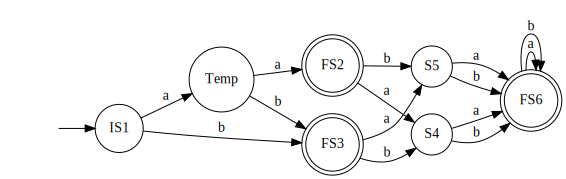

In [15]:
dotObj_dfa(DFA_bloated)

## Show the result of reversing the above DFA

In [16]:
help(rev_dfa)

Help on function rev_dfa in module jove.Def_NFA:

rev_dfa(D)
    In : D = a partially consistent DFA without any unreachable states.
    Out: A consistent NFA whose language is D's language reversed.



### The reverse invocation

In [17]:
# Reverse DFA_bloated here

NFA1 =  rev_dfa(DFA_bloated)

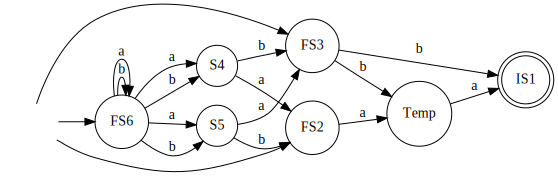

In [18]:
dotObj_nfa(NFA1)

## Check that NFA1 is indeed the reverse of DFA_bloated by checking one string

Point out that "aabba" is in DFA_bloated's language but its reversal (i.e. "abbaa") is in NFA1's language

### Which path does abbaa take in being accepted by NFA1 ?

.... LIST THE PATH AS A SEQUENCE OF STATES, HERE ....

* Starting from State FS6

* The next state after 'a' is FS6

* The next state after 'b' is S5

* The next state after 'b' is FS2

* The next state after 'a' is Temp

* The next state after 'a' is IS1  (This must be the final state!)


## Determinize NFA1 to obtain DFA2

In [19]:
help(nfa2dfa)

Help on function nfa2dfa in module jove.Def_NFA:

nfa2dfa(N, STATENAME_MAXSIZE=20)
    In : N (consistent NFA), and optional STATENAME_MAXSIZE
         for the generated DFA states
    Out: A consistent DFA that is language-equivalent to N.



In [21]:
DFA2 = nfa2dfa(NFA1)

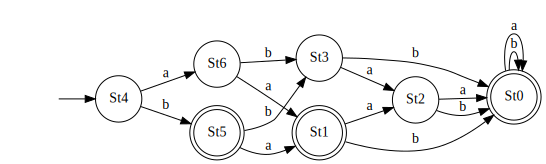

In [22]:
dotObj_dfa(DFA2)

## Reverse DFA2 to obtain NFA3

In [23]:
NFA3 = rev_dfa(DFA2)

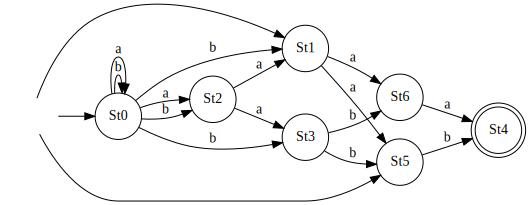

In [24]:
dotObj_nfa(NFA3)

## One more determinization, and we are done minimizing


In [25]:
DFA_min = nfa2dfa(NFA3)

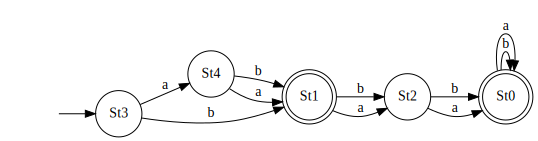

In [26]:
dotObj_dfa(DFA_min)

# Check that DFA_min and DFA_bloated have the same language but are not isomorphic

In [27]:
help(langeq_dfa)

Help on function langeq_dfa in module jove.Def_DFA:

langeq_dfa(D1, D2, gen_counterex=False)
    Given consistent and total DFAs D1 and D2,
    check whether they are language-equivalent. 
    gen_counterex is a flag that triggers the
     printing of a counter-example showing the
     pairs that were marched in tandem till a
     difference was found.
     
    Two DFAs are language-equivalent if they 
    accept the same set of strings. We determine
    this through a joint depth-first walk of the 
    two DFAs until we detect a difference (return
    False then) or all pairs of states have been
    visited (return True then).



In [28]:
help(iso_dfa)

Help on function iso_dfa in module jove.Def_DFA:

iso_dfa(D1, D2)
    Given consistent and total DFAs D1 and D2,
    check whether they are isomorphic. Two DFAs
    are isomorphic if they have the same number
    of states and are language-equivalent. (One would
    then be able to match-up state for state and transition
    for transition.)



In [29]:
langeq_dfa(DFA_bloated, DFA_min)

True

In [30]:
iso_dfa(DFA_bloated, DFA_min)

False

##  But DFA_min indeed is minimal as shown by the number of states of the standard DFA min algorithm

In [31]:
DFA_min_alt = min_dfa(DFA_bloated)

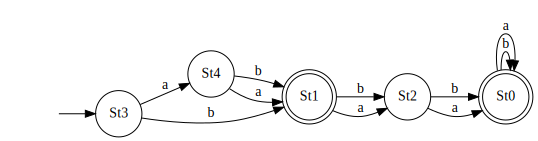

In [32]:
dotObj_dfa(DFA_min)

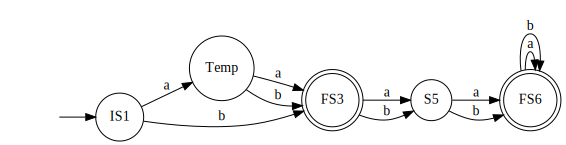

In [33]:
dotObj_dfa(DFA_min_alt)

In [34]:
help(iso_dfa)

Help on function iso_dfa in module jove.Def_DFA:

iso_dfa(D1, D2)
    Given consistent and total DFAs D1 and D2,
    check whether they are isomorphic. Two DFAs
    are isomorphic if they have the same number
    of states and are language-equivalent. (One would
    then be able to match-up state for state and transition
    for transition.)



In [35]:
iso_dfa(DFA_min, DFA_min_alt)



True

# END of demonstration that DFA minimization can be done in two different ways

## Here are some notes to understand Brzozowski's method

* If you are given a DFA "D1", a minimal DFA for "reverse(D1)" is obtained by "reverse followed by determinize"

* But since we are interested in the minimal DFA for "D1" (and not reverse(D1)), we do these steps again!

* Hence the algorithm becomes "reverse THEN determinize THEN reverse THEN determinize"